# CAPSTONE PROJECT (Crimes in India-2023)

# Phase 3 - SQL Operations



## 3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table



In [57]:
import sqlite3
import pandas as pd

In [111]:
db =sqlite3.connect('Indian_crimes.db')
db.execute("DROP TABLE IF EXISTS CRIME")
db.execute('''CREATE TABLE CRIME
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,Rape INTEGER,Kidnapping INTEGER,Dowry INTEGER,Assault INTEGER,Insult  INTEGER,Cruelty INTEGER, Importation INTEGER)''')

In [112]:
import csv

with open('42_District_wise_crimes_committed_against_women_2001_2012.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        db.execute("INSERT INTO CRIME (STATE, DISTRICT,Year,Rape,Kidnapping,Dowry,Assault,Insult,Cruelty,Importation) VALUES (?,?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['Year'],row['Rape'],row['Kidnapping and Abduction'],row['Dowry Deaths'],row['Assault on women with intent to outrage her modesty'],row['Insult to modesty of Women'],row['Cruelty by Husband or his Relatives'],row['Importation of Girls']))

In [113]:
db.commit()

# 3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

### Highest number of Rapes & Kidnapping by District  and  year

In [121]:
cursor = db.execute("SELECT STATE, DISTRICT,Year,Rape FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Rape DESC LIMIT 1")

for row in cursor:
    print("THE DISTRICT- {} OF STATE - {} RECORDED THE MAXIMUM NUMBER OF RAPE IN THE YEAR - {} COUNTING TO - {} ".format(row[1],row[0],row[2],row[3]))

cursor = db.execute("SELECT STATE, DISTRICT,Year,Kidnapping FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Kidnapping DESC LIMIT 1")

for row in cursor:
    print("\nTHE DISTRICT- {} OF STATE - {} RECORDED THE MAXIMUM NO. OF KIDNAPPINGS IN THE YEAR - {} COUNTING TO - {} ".format(row[1],row[0],row[2],row[3]))


THE DISTRICT- MURSHIDABAD OF STATE - WEST BENGAL RECORDED THE MAXIMUM NUMBER OF RAPE IN THE YEAR - 2009 COUNTING TO - 568 

THE DISTRICT- MURSHIDABAD OF STATE - WEST BENGAL RECORDED THE MAXIMUM NO. OF KIDNAPPINGS IN THE YEAR - 2011 COUNTING TO - 492 


### Highest number of Rapes & Kidnapping by State and year

In [122]:
cursor = db.execute("SELECT STATE, DISTRICT,Year,SUM(Rape) AS TOTAL_STATEWISE_RAPE FROM CRIME GROUP BY STATE,Year HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY TOTAL_STATEWISE_RAPE DESC LIMIT 1")

for row in cursor:
    print("THE STATE - {} RECORDED THE MAXIMUM NUMBER OF RAPE IN THE YEAR - {} COUNTING TO - {} ".format(row[0],row[2],row[3]))

    
cursor = db.execute("SELECT STATE, DISTRICT,Year,SUM(Kidnapping) AS TOTAL_STATEWISE_KIDNAPPING FROM CRIME GROUP BY STATE,Year HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY TOTAL_STATEWISE_KIDNAPPING DESC LIMIT 1")

for row in cursor:
    print("\nTHE STATE - {} RECORDED THE MAXIMUM NO. OF KIDNAPPINGS IN THE YEAR - {} COUNTING TO - {} ".format(row[0],row[2],row[3]))


THE STATE - MADHYA PRADESH RECORDED THE MAXIMUM NUMBER OF RAPE IN THE YEAR - 2012 COUNTING TO - 3425 

THE STATE - UTTAR PRADESH RECORDED THE MAXIMUM NO. OF KIDNAPPINGS IN THE YEAR - 2012 COUNTING TO - 7910 


# 3.3 Write SQL query to find the lowest number of rapes & Kidnappings that happened in which state, District, and year

### Lowest number of Rapes & Kidnapping by District and year

In [167]:
cursor = db.execute("SELECT STATE, DISTRICT,Year,Rape FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Rape<0")

for row in cursor:
    print("THE DISTRICT- {} OF STATE - {} RECORDED THE LOWEST NUMBER OF RAPE IN THE YEAR - {} COUNTING TO - {} \n".format(row[1],row[0],row[2],row[3]))

cursor = db.execute("SELECT STATE, DISTRICT,Year,Kidnapping FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Kidnapping<0")

for row in cursor:
    print("\nTHE DISTRICT- {} OF STATE - {} RECORDED THE LOWEST NO. OF KIDNAPPING IN THE YEAR - {} COUNTING TO - {} ".format(row[1],row[0],row[2],row[3]))


THE DISTRICT- ADILABAD OF STATE - ANDHRA PRADESH RECORDED THE LOWEST NUMBER OF RAPE IN THE YEAR - 2001 COUNTING TO - 50 

THE DISTRICT- ANANTAPUR OF STATE - ANDHRA PRADESH RECORDED THE LOWEST NUMBER OF RAPE IN THE YEAR - 2001 COUNTING TO - 23 

THE DISTRICT- CHITTOOR OF STATE - ANDHRA PRADESH RECORDED THE LOWEST NUMBER OF RAPE IN THE YEAR - 2001 COUNTING TO - 27 

THE DISTRICT- CUDDAPAH OF STATE - ANDHRA PRADESH RECORDED THE LOWEST NUMBER OF RAPE IN THE YEAR - 2001 COUNTING TO - 20 

THE DISTRICT- EAST GODAVARI OF STATE - ANDHRA PRADESH RECORDED THE LOWEST NUMBER OF RAPE IN THE YEAR - 2001 COUNTING TO - 23 

THE DISTRICT- GUNTAKAL RLY. OF STATE - ANDHRA PRADESH RECORDED THE LOWEST NUMBER OF RAPE IN THE YEAR - 2001 COUNTING TO - 0 

THE DISTRICT- GUNTUR OF STATE - ANDHRA PRADESH RECORDED THE LOWEST NUMBER OF RAPE IN THE YEAR - 2001 COUNTING TO - 54 

THE DISTRICT- HYDERABAD CITY OF STATE - ANDHRA PRADESH RECORDED THE LOWEST NUMBER OF RAPE IN THE YEAR - 2001 COUNTING TO - 37 

THE DISTRI

### Lowest number of Rapes & KidnappingS by STATE and year

In [46]:
cursor = db.execute("SELECT STATE, DISTRICT,Year,Rape FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Rape ASC LIMIT 1")

for row in cursor:
    print("THE STATE - {} RECORDED THE LOWEST NUMBER OF RAPE IN THE YEAR - {} COUNTING TO - {} ".format(row[0],row[2],row[3]))

cursor = db.execute("SELECT STATE, DISTRICT,Year,Kidnapping FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Kidnapping ASC LIMIT 1")

for row in cursor:
    print("\nTHE STATE - {} RECORDED THE LOWEST NO. OF KIDNAPPINGS IN THE YEAR - {} COUNTING TO - {} ".format(row[0],row[2],row[3]))



THE STATE - ANDHRA PRADESH RECORDED THE LOWEST NO. OF KIDNAPPINGS IN THE YEAR - 2001 COUNTING TO - 0 


# 3.4	Insert records from 
## 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [3]:
import sqlite3
import pandas as pd
db =sqlite3.connect('Indian_crimes.db')
db.execute("DROP TABLE IF EXISTS ST_CRIME")
db.execute('''CREATE TABLE st_CRIME
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,Murder INTEGER,Rape INTEGER,Kidnapping INTEGER,Dacoity INTEGER,Robbery INTEGER,Arson INTEGER,Hurt INTEGER,Protection INTEGER,Prevention INTEGER,Other_crime INTEGER)''')

In [4]:
import csv

with open('02_District_wise_crimes_committed_against_ST_2001_2012.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        db.execute("INSERT INTO ST_CRIME (STATE, DISTRICT,Year,Murder,Rape,Kidnapping,Dacoity,Robbery,Arson,Hurt,Protection,Prevention,Other_crime) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['Year'],row['Murder'],row['Rape'],row['Kidnapping Abduction'],row['Dacoity'],row['Robbery'],row['Arson'],row['Hurt'],row['Protection of Civil Rights (PCR) Act'],row['Prevention of atrocities (POA) Act'],row['Other Crimes Against STs']))

In [5]:
db.commit()

In [6]:
cursor=db.execute('SELECT * FROM ST_CRIME')

for row in cursor:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 0, 1, 2, 0, 0, 0, 2, 0, 0, 13)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 0, 0, 0, 0, 0, 0, 7, 0, 1, 6)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 0, 2, 1, 0, 0, 0, 10, 0, 3, 19)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 0, 0, 0, 0, 0, 0, 15, 0, 0, 2)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 1, 4, 0, 0, 0, 0, 8, 0, 9, 20)
('ANDHRA PRADESH', 'KRISHNA', 2001, 0, 0, 1, 0, 0, 0, 6, 0, 24, 18)
('ANDHRA PRADESH', 'KURNOOL', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 1, 1, 0, 0, 0, 0, 6, 0, 11, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 0, 1, 0, 0, 0, 1, 0, 0, 4, 3)
('ANDHRA PRADESH', 'NALGONDA', 2001, 

# 3.5 Write SQL query to find the highest number of dacoity/robbery in which district.

In [13]:
cursor = db.execute("SELECT STATE, DISTRICT,Year,SUM(Dacoity) AS TOTAL_STATEWISE_Dacoity FROM st_CRIME GROUP BY STATE,Year HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY TOTAL_STATEWISE_Dacoity DESC LIMIT 1")
for row in cursor:
    print("\n\nTHE DISTRICT --{} RECORDED THE MAXIMUM NUMBER OF Dacoity IN THE YEAR-- {} COUNTING TO-- {} ".format(row[1],row[2],row[3]))

cursor = db.execute("SELECT STATE, DISTRICT,Year,SUM(Robbery) AS TOTAL_STATEWISE_Robbery FROM st_CRIME GROUP BY STATE,Year HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY TOTAL_STATEWISE_Robbery DESC LIMIT 1")

for row in cursor:
    print("\nTHE DISTRICT- {} RECORDED THE MAXIMUM NO. OF ROBBERY IN THE YEAR - {} COUNTING TO - {} ".format(row[1],row[2],row[3]))




THE DISTRICT --AHMEDABAD COMMR. RECORDED THE MAXIMUM NUMBER OF Dacoity IN THE YEAR-- 2004 COUNTING TO-- 29 

THE DISTRICT- AHMEDABAD COMMR. RECORDED THE MAXIMUM NO. OF ROBBERY IN THE YEAR - 2004 COUNTING TO - 34 


# 3.6 Write SQL query to find in which districts(All) the lowest number of murders happened

In [70]:
cursor = db.execute("SELECT STATE, DISTRICT,Year,Murder FROM ST_CRIME WHERE DISTRICT NOT IN ('TOTAL') ORDER BY Murder !=0 ")

for row in cursor:
    print("\nTHE DISTRICT - {} RECORDED THE LOWEST NUMBER OF MURDER IN THE YEAR - {} COUNTING TO - {} ".format(row[1],row[2],row[3]))



THE DISTRICT - ADILABAD RECORDED THE LOWEST NUMBER OF MURDER IN THE YEAR - 2001 COUNTING TO - 0 

THE DISTRICT - ANANTAPUR RECORDED THE LOWEST NUMBER OF MURDER IN THE YEAR - 2001 COUNTING TO - 0 

THE DISTRICT - CHITTOOR RECORDED THE LOWEST NUMBER OF MURDER IN THE YEAR - 2001 COUNTING TO - 0 

THE DISTRICT - CUDDAPAH RECORDED THE LOWEST NUMBER OF MURDER IN THE YEAR - 2001 COUNTING TO - 0 

THE DISTRICT - EAST GODAVARI RECORDED THE LOWEST NUMBER OF MURDER IN THE YEAR - 2001 COUNTING TO - 0 

THE DISTRICT - GUNTAKAL RLY. RECORDED THE LOWEST NUMBER OF MURDER IN THE YEAR - 2001 COUNTING TO - 0 

THE DISTRICT - GUNTUR RECORDED THE LOWEST NUMBER OF MURDER IN THE YEAR - 2001 COUNTING TO - 0 

THE DISTRICT - HYDERABAD CITY RECORDED THE LOWEST NUMBER OF MURDER IN THE YEAR - 2001 COUNTING TO - 0 

THE DISTRICT - KARIMNAGAR RECORDED THE LOWEST NUMBER OF MURDER IN THE YEAR - 2001 COUNTING TO - 0 

THE DISTRICT - KRISHNA RECORDED THE LOWEST NUMBER OF MURDER IN THE YEAR - 2001 COUNTING TO - 0 

THE

# 3.7 Write SQL query to find the number of murders in ascending order in district and year-wise.

In [77]:
cursor = db.execute("SELECT STATE, DISTRICT,Year,SUM(Murder) AS TOTAL_STATEWISE_Murder FROM st_CRIME GROUP BY DISTRICT,Year ORDER BY TOTAL_STATEWISE_Murder ASC ")

for row in cursor:
    print("\n\nTHE RECORD OF TOTAL NUMBER OF Murder-- {} IN DISTRICT --{} IN THE YEAR-- {}  ".format(row[3],row[2],row[2]))



THE RECORD OF TOTAL NUMBER OF Murder-- 0 IN DISTRICT --2001 IN THE YEAR-- 2001  


THE RECORD OF TOTAL NUMBER OF Murder-- 0 IN DISTRICT --2002 IN THE YEAR-- 2002  


THE RECORD OF TOTAL NUMBER OF Murder-- 0 IN DISTRICT --2003 IN THE YEAR-- 2003  


THE RECORD OF TOTAL NUMBER OF Murder-- 0 IN DISTRICT --2004 IN THE YEAR-- 2004  


THE RECORD OF TOTAL NUMBER OF Murder-- 0 IN DISTRICT --2005 IN THE YEAR-- 2005  


THE RECORD OF TOTAL NUMBER OF Murder-- 0 IN DISTRICT --2006 IN THE YEAR-- 2006  


THE RECORD OF TOTAL NUMBER OF Murder-- 0 IN DISTRICT --2007 IN THE YEAR-- 2007  


THE RECORD OF TOTAL NUMBER OF Murder-- 0 IN DISTRICT --2008 IN THE YEAR-- 2008  


THE RECORD OF TOTAL NUMBER OF Murder-- 0 IN DISTRICT --2009 IN THE YEAR-- 2009  


THE RECORD OF TOTAL NUMBER OF Murder-- 0 IN DISTRICT --2010 IN THE YEAR-- 2010  


THE RECORD OF TOTAL NUMBER OF Murder-- 0 IN DISTRICT --2011 IN THE YEAR-- 2011  


THE RECORD OF TOTAL NUMBER OF Murder-- 0 IN DISTRICT --2012 IN THE YEAR-- 2012  


TH

# 3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from

# 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [1]:
import sqlite3
import pandas as pd
db =sqlite3.connect('IPC_crime.db')
db.execute("DROP TABLE IF EXISTS IPC_CRIME")
db.execute('''CREATE TABLE IPC_CRIME
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,MURDER INTEGER,ATTEMPT_MURDER INTEGER,CULPABLE_MURDER INTEGER,RAPE INTEGER,CUSTODIAL_RAPE INTEGER,OTHER_RAPE INTEGER,KIDNAPPING INTEGER,KIDNAPPING_GIRLS INTEGER,KIDNAPPING_OTHERS INTEGER,DACOITY INTEGER,PREPARATION_DACOITY INTEGER,ROBBERY INTEGER,BURGLARY INTEGER,THEFT INTEGER,AUTO_THEFT INTEGER,OTHER_THEFT INTEGER,RIOTS INTEGER,CRIMINAL_TRUST INTEGER,CHEATING INTEGER,COUNTERFIETING INTEGER,ARSON INTEGER,HURT INTEGER,DOWRY_DEATHS INTEGER,ASSAULT_WOMEN INTEGER,INSULT_WOMEN INTEGER,CRUELTY_HUSBAND INTEGER,IMPORTATION INTEGER,CAUSING_DEATH INTEGER,OTHER_IPC_CRIMES INTEGER,TOTAL_IPC_CRIMES INTEGER)''')


In [2]:
import csv

with open('01_District_wise_crimes_committed_IPC_2001_2012.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        db.execute("INSERT INTO IPC_CRIME (STATE, DISTRICT,Year,MURDER,ATTEMPT_MURDER,CULPABLE_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING,KIDNAPPING_GIRLS,KIDNAPPING_OTHERS,DACOITY,PREPARATION_DACOITY,ROBBERY,BURGLARY,THEFT,AUTO_THEFT,OTHER_THEFT,RIOTS,CRIMINAL_TRUST,CHEATING,COUNTERFIETING,ARSON,HURT,DOWRY_DEATHS,ASSAULT_WOMEN,INSULT_WOMEN,CRUELTY_HUSBAND,IMPORTATION,CAUSING_DEATH,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['YEAR'],row['MURDER'],row['ATTEMPT TO MURDER'],row['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'],row['RAPE'],row['CUSTODIAL RAPE'],row['OTHER RAPE'],row['KIDNAPPING & ABDUCTION'],row['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'],row['KIDNAPPING AND ABDUCTION OF OTHERS'],row['DACOITY'],row['PREPARATION AND ASSEMBLY FOR DACOITY'],row['ROBBERY'],row['BURGLARY'],row['THEFT'],row['AUTO THEFT'],row['OTHER THEFT'],row['RIOTS'],row['CRIMINAL BREACH OF TRUST'],row['CHEATING'],row['COUNTERFIETING'],row['ARSON'],row['HURT/ GREVIOUS HURT'],row['DOWRY DEATHS'],row['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'],row['INSULT TO MODESTY OF WOMEN'],row['CRUELTY BY HUSBAND OR HIS RELATIVES'],row['IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'],row['CAUSING DEATH BY NEGLIGENCE'],row['OTHER IPC CRIMES'],row['TOTAL IPC CRIMES']))
   

In [3]:
cursor=db.execute("SELECT * FROM IPC_CRIME")

In [4]:
for row in cursor:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 101, 60, 17, 50, 0, 50, 46, 30, 16, 9, 0, 41, 198, 199, 22, 177, 78, 16, 104, 1, 30, 1131, 16, 149, 34, 175, 0, 181, 1518, 4154)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 151, 125, 1, 23, 0, 23, 53, 30, 23, 8, 0, 16, 191, 366, 57, 309, 168, 11, 65, 8, 69, 1543, 7, 118, 24, 154, 0, 270, 754, 4125)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 101, 57, 2, 27, 0, 27, 59, 34, 25, 4, 0, 14, 237, 723, 164, 559, 156, 33, 209, 9, 38, 2088, 14, 112, 83, 186, 0, 404, 1262, 5818)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 80, 53, 1, 20, 0, 20, 25, 20, 5, 1, 0, 4, 98, 173, 36, 137, 164, 12, 37, 2, 23, 795, 17, 126, 38, 57, 0, 233, 1181, 3140)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 82, 67, 1, 23, 0, 23, 49, 26, 23, 4, 0, 25, 437, 1021, 150, 871, 70, 50, 220, 3, 41, 1244, 12, 109, 58, 247, 0, 431, 2313, 6507)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 3, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 2, 0, 162, 0, 162, 1, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 4, 104, 287)
('ANDHRA PRADESH', 'GUNTUR', 200

# 3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [5]:
cursor = db.execute("SELECT p.STATE,p.DISTRICT,p.MURDER,P.YEAR from( SELECT x.*,rank() over(partition by x.year,x.state order by x.murder desc ) as rnk FROM(SELECT STATE,DISTRICT,MURDER,YEAR FROM IPC_CRIME WHERE DISTRICT NOT IN('TOTAL','DELHI UT TOTAL') ORDER BY STATE,YEAR) x) p where p.rnk=1 order by p.STATE")

for row in cursor:
    print("\n\n IN THE YEAR--{} THE DISTRICT '{}' OF THE STATE '{}' HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO {}".format(row[3],row[1],row[0],row[2]))



 IN THE YEAR--2001 THE DISTRICT 'ANDAMAN' OF THE STATE 'A & N ISLANDS' HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 13


 IN THE YEAR--2002 THE DISTRICT 'ANDAMAN' OF THE STATE 'A & N ISLANDS' HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 14


 IN THE YEAR--2003 THE DISTRICT 'ANDAMAN' OF THE STATE 'A & N ISLANDS' HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 16


 IN THE YEAR--2004 THE DISTRICT 'ANDAMAN' OF THE STATE 'A & N ISLANDS' HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 13


 IN THE YEAR--2005 THE DISTRICT 'ANDAMAN' OF THE STATE 'A & N ISLANDS' HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 14


 IN THE YEAR--2006 THE DISTRICT 'ANDAMAN' OF THE STATE 'A & N ISLANDS' HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 3


 IN THE YEAR--2007 THE DISTRICT 'A and N ISLANDS' OF THE STATE 'A & N ISLANDS' HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 15


 IN THE YEAR--2008 THE DISTRICT 'ANDAMAN' OF THE STATE 'A & N ISLANDS' HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 8


 IN THE 

# 3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding State/UT, district, murders, and year in descending order.

In [6]:
state=[]
district=[]
murder=[]
year=[]

In [7]:
cursor = db.execute("SELECT p.STATE,p.DISTRICT,p.MURDER,P.YEAR from( SELECT x.*,rank() over(partition by x.year,x.state order by x.murder desc ) as rnk FROM(SELECT STATE,DISTRICT,MURDER,YEAR FROM IPC_CRIME WHERE DISTRICT NOT IN('TOTAL','DELHI UT TOTAL') ORDER BY STATE,YEAR) x) p where p.rnk=1 order by p.STATE")


In [8]:
for row in cursor:
    state.append(row[0])
    district.append(row[1])
    murder.append(row[2])
    year.append(row[3])

In [9]:
ipc_crime=pd.DataFrame({'STATE/UT':state,'DISTRICT':district,'TOTAL MURDER':murder,'YEAR':year})

In [10]:
ipc_crime.head(50)

STATE/UT         DISTRICT  TOTAL MURDER  YEAR
0       A & N ISLANDS          ANDAMAN            13  2001
1       A & N ISLANDS          ANDAMAN            14  2002
2       A & N ISLANDS          ANDAMAN            16  2003
3       A & N ISLANDS          ANDAMAN            13  2004
4       A & N ISLANDS          ANDAMAN            14  2005
5       A & N ISLANDS          ANDAMAN             3  2006
6       A & N ISLANDS  A and N ISLANDS            15  2007
7       A & N ISLANDS          ANDAMAN             8  2008
8       A & N ISLANDS          ANDAMAN            15  2009
9       A & N ISLANDS          ANDAMAN             8  2010
10      A & N ISLANDS          ANDAMAN            14  2011
11      A & N ISLANDS            SOUTH             8  2012
12     ANDHRA PRADESH      RANGA REDDY           214  2001
13     ANDHRA PRADESH      RANGA REDDY           214  2002
14     ANDHRA PRADESH           GUNTUR           210  2003
15     ANDHRA PRADESH    MAHABOOBNAGAR           183  2004
16     ANDHRA PRADESH    MAHABOOBNAGAR           212  2005
17     ANDHRA PRADESH        CYBERABAD           193  2006
18     ANDHRA PRADESH        CYBERABAD           186  2007
19     ANDHRA PRADESH        CYBERABAD           197  2008
20     ANDHRA PRADESH        CYBERABAD           186  2009
21     ANDHRA PRADESH        CYBERABAD           187  2010
22     ANDHRA PRADESH        CYBERABAD           213  2011
23     ANDHRA PRADESH        CYBERABAD           198  2012
24  ARUNACHAL PRADESH            LOHIT            16  2001
25  ARUNACHAL PRADESH            LOHIT            14  2002
26  ARUNACHAL PRADESH            LOHIT            16  2003
27  ARUNACHAL PRADESH            LOHIT            10  2004
28  ARUNACHAL PRADESH  SUBANSIRI UPPER            10  2004
29  ARUNACHAL PRADESH            LOHIT            14  2005
30  ARUNACHAL PRADESH       PAPUM PARE            10  2006
31  ARUNACHAL PRADESH            LOHIT            17  2007
32  ARUNACHAL PRADESH            LOHIT            11  2008
33  ARUNACHAL PRADESH       PAPUM PARE            11  2008
34  ARUNACHAL PRADESH       SIANG WEST            11  2009
35  ARUNACHAL PRADESH       SIANG WEST             9  2010
36  ARUNACHAL PRADESH            LOHIT            12  2011
37  ARUNACHAL PRADESH            LOHIT            11  2012
38              ASSAM        DIBRUGARH           110  2001
39              ASSAM         TINSUKIA           115  2002
40              ASSAM        DIBRUGARH           107  2003
41              ASSAM        DIBRUGARH           125  2004
42              ASSAM        DIBRUGARH           113  2005
43              ASSAM        DIBRUGARH           104  2006
44              ASSAM         TINSUKIA           143  2007
45              ASSAM         TINSUKIA           114  2008
46              ASSAM         SONITPUR           109  2009
47              ASSAM         TINSUKIA            96  2010
48              ASSAM         TINSUKIA            98  2011
49              ASSAM        KOKRAJHAR           110  2012

In [11]:
from collections import Counter
sdata=ipc_crime['STATE/UT'].unique().tolist()

In [13]:
ind=[]
for i in sdata:
    rep=[]
    for j in (ipc_crime[ipc_crime['STATE/UT']==i].index.tolist()):
        rep.append(ipc_crime[ipc_crime['STATE/UT']==i]['DISTRICT'][j])
    ff=Counter(rep)
    lil=[]
    for p in ff.keys():
        if(ff[p]>=3):
            lil.append(p)
    for k in lil:
        ind.extend(ipc_crime[ipc_crime['DISTRICT']==k].index.to_list())
new_sdata=ipc_crime.iloc[ind].copy()    

In [14]:
Counter(new_sdata['DISTRICT'])

Counter({'ANDAMAN': 10,
         'CYBERABAD': 7,
         'LOHIT': 9,
         'DIBRUGARH': 5,
         'TINSUKIA': 5,
         'PATNA': 12,
         'CHANDIGARH': 12,
         'SARGUJA': 3,
         'BILASPUR': 6,
         'D and N HAVELI': 12,
         'DAMAN': 12,
         'NORTH WEST': 4,
         'OUTER': 5,
         'NORTH GOA': 10,
         'SURAT COMMR.': 9,
         'AHMEDABAD COMMR.': 3,
         'SONIPAT': 6,
         'GURGAON': 5,
         'KANGRA': 11,
         'BARAMULLA': 5,
         'JAMMU': 3,
         'RANCHI': 10,
         'BANGALORE COMMR.': 12,
         'PALAKKAD': 5,
         'THRISSUR': 3,
         'LAKSHADWEEP': 12,
         'JHABUA': 6,
         'INDORE': 6,
         'MUMBAI': 5,
         'MUMBAI COMMR.': 7,
         'IMPHAL(WEST)': 4,
         'THOUBAL': 3,
         'IMPHAL WEST': 3,
         'KHASI HILLS EAST': 3,
         'JAINTIA HILLS': 9,
         'AIZAWL': 11,
         'DIMAPUR': 10,
         'MAYURBHANJ': 6,
         'SUNDARGARH': 3,
         'KEONJHAR'

### Data shows equal to three or more than 3 count of Murders happened in Districts

In [15]:
new_sdata.sort_values(by='TOTAL MURDER',ascending=False,inplace=True)
new_sdata

STATE/UT     DISTRICT  TOTAL MURDER  YEAR
53         BIHAR        PATNA           542  2004
52         BIHAR        PATNA           484  2003
51         BIHAR        PATNA           472  2002
54         BIHAR        PATNA           436  2005
50         BIHAR        PATNA           434  2001
..           ...          ...           ...   ...
237  LAKSHADWEEP  LAKSHADWEEP             0  2012
231  LAKSHADWEEP  LAKSHADWEEP             0  2006
229  LAKSHADWEEP  LAKSHADWEEP             0  2004
227  LAKSHADWEEP  LAKSHADWEEP             0  2002
228  LAKSHADWEEP  LAKSHADWEEP             0  2003

[372 rows x 4 columns]

# 3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

In [16]:
newd=new_sdata.groupby(by='DISTRICT').sum().reset_index().sort_values(by='TOTAL MURDER',ascending=False)

In [17]:
newd

DISTRICT  TOTAL MURDER   YEAR
42              PATNA          4586  24078
6    BANGALORE COMMR.          2831  24078
45             RANCHI          2322  20055
36      MUMBAI COMMR.          1542  14063
0   24 PARGANAS NORTH          1521  16037
37      MUZAFFARNAGAR          1475  12028
13          CYBERABAD          1360  14063
35             MUMBAI          1254  10015
11            CHENNAI          1137  18069
53               WEST           995  28089
49       SURAT COMMR.           878  18069
27             JHABUA           761  12021
23             INDORE           734  12057
1   24 PARGANAS SOUTH           710   6031
20           HARIDWAR           691  20062
9            BILASPUR           593  12049
4               ALWAR           572  12053
52           TINSUKIA           566  10038
16          DIBRUGARH           559  10019
34         MAYURBHANJ           524  12039
39         NORTH WEST           504   8010
7           BARAMULLA           476  10019
47            SONIPAT           454  12030
40              OUTER           454  10049
8           BHARATPUR           428  10027
19            GURGAON           421  10036
24      JAINTIA HILLS           411  18071
33           LUDHIANA           410  12030
2    AHMEDABAD COMMR.           404   6009
29           KEONJHAR           381   8035
25          JALANDHAR           354  10023
46            SARGUJA           317   6007
17            DIMAPUR           283  20069
28             KANGRA           272  22074
38          NORTH GOA           254  20066
48         SUNDARGARH           252   6010
12        CP LUDHIANA           245   6033
10         CHANDIGARH           243  24078
41           PALAKKAD           215  10039
43        PONDICHERRY           185  14028
22       IMPHAL(WEST)           153   8011
44         PUDUCHERRY           146  10050
3              AIZAWL           136  22076
30   KHASI HILLS EAST           131   6007
51           THRISSUR           123   6019
32              LOHIT           121  18053
5             ANDAMAN           118  20059
21        IMPHAL WEST           117   6027
14     D and N HAVELI           108  24078
50            THOUBAL           100   6024
18               EAST            64  18057
15              DAMAN            64  24078
26              JAMMU            62   6031
31        LAKSHADWEEP             3  24078

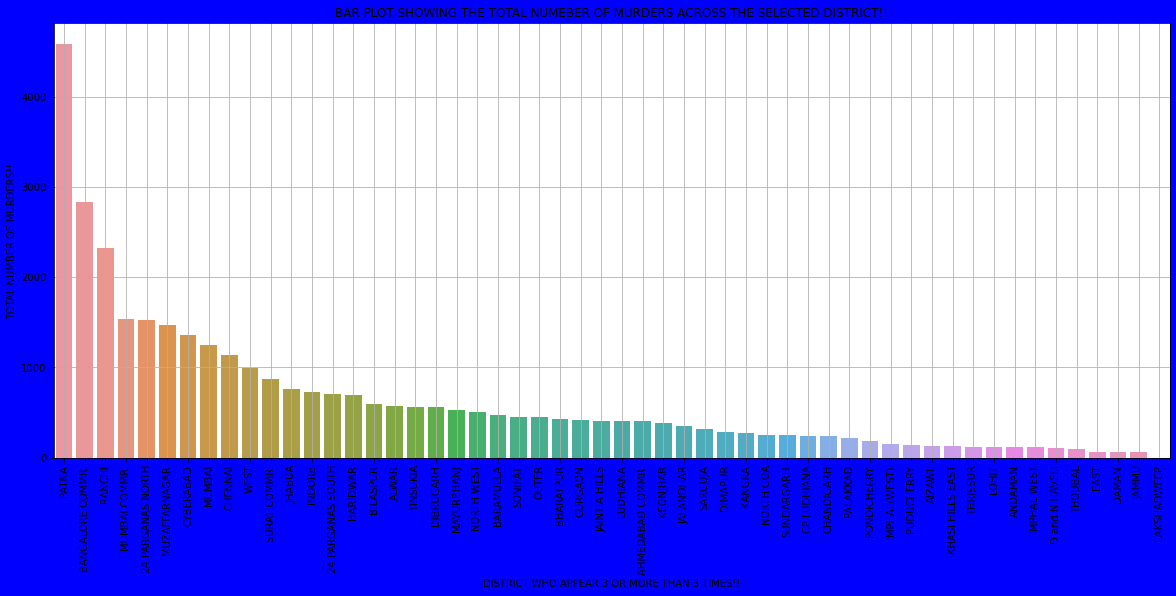

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8),facecolor='blue')
sns.barplot(x=newd['DISTRICT'],y=newd['TOTAL MURDER'])
plt.xticks(rotation=90)
plt.xlabel("DISTRICT WHO APPEAR 3 OR MORE THAN 3 TIMES!!")
plt.ylabel("TOTAL NUMBER OF MURDERS!!")
plt.grid()
plt.title("BAR PLOT SHOWING THE TOTAL NUMEBER OF MURDERS ACROSS THE SELECTED DISTRICT!!")
plt.show()


As the Graph shows that the highest rate of Murder among the Districts is Patna and the lowest no. of Murder rate is Lakshdweep 

In [27]:
new1=new_sdata.groupby(by='YEAR').sum().reset_index().sort_values(by='TOTAL MURDER',ascending=False)

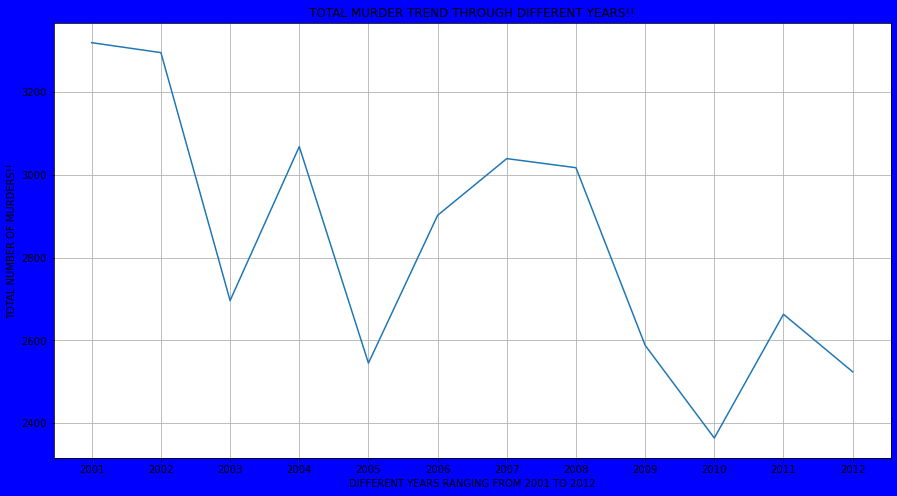

In [28]:
plt.figure(figsize=(15,8),facecolor='blue')
sns.lineplot(x=new1['YEAR'],y=new1['TOTAL MURDER'])
plt.xlabel("DIFFERENT YEARS RANGING FROM 2001 TO 2012")
plt.xticks([x for x in range(2001,2013)])
plt.ylabel("TOTAL NUMBER OF MURDERS!!")
plt.grid()
plt.title("TOTAL MURDER TREND THROUGH DIFFERENT YEARS!!")
plt.show()

After analyse the graph and data that the Murder rate in 2001 is the highest as compare to other years and it is year to year decreasing after 2001. The lowest crime rate of Murder is 2010 as compare to other.

### End of Phase== 3